In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data= pd.read_csv("Customer Churn.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# inspect the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Replace Null Values with zero
customer_data["TotalCharges"]=customer_data["TotalCharges"].replace(" ", "0")
# Convert the column type TotalCharges from object to float
customer_data["TotalCharges"]=customer_data["TotalCharges"].astype(float)

In [6]:
# Checks the total no. of null values in the DataFrame
customer_data.isnull().sum().sum()

0

In [7]:
# Checks the total no. of null values in the DataFrame in each rows
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#seraching the Duplicate Values
customer_data["customerID"].duplicated().sum()

0

In [9]:
# Converting the int binary data to Yes/No format
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

customer_data["SeniorCitizen"]=customer_data["SeniorCitizen"].apply(conv)

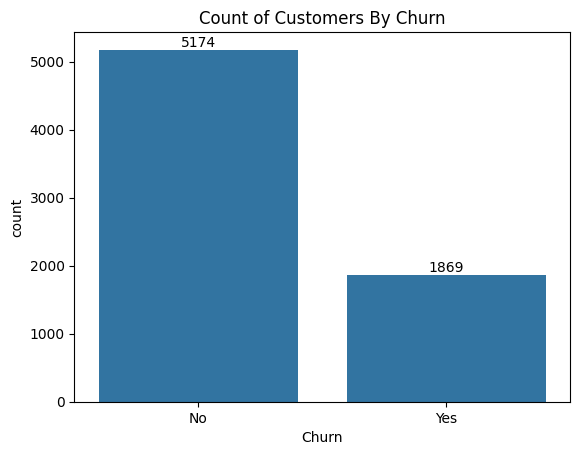

In [10]:
# Plotting the churn count in a graph
ax=sns.countplot(x="Churn", data= customer_data)
ax.bar_label(ax.containers[0]) #for showing the values of the bar graphs
plt.title("Count of Customers By Churn")
plt.show()

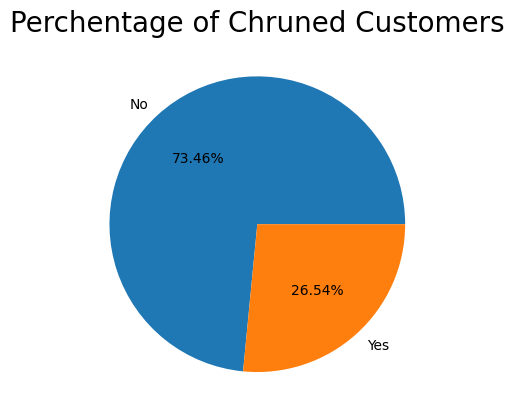

In [11]:
# For checking the values in percentage
gb=customer_data.groupby("Churn").agg({"Churn":"count"})
gb
                                  
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Perchentage of Chruned Customers", fontsize=20)
plt.show()

In [12]:
# From the given piechart we can conclude that 26.54% of customers churned out


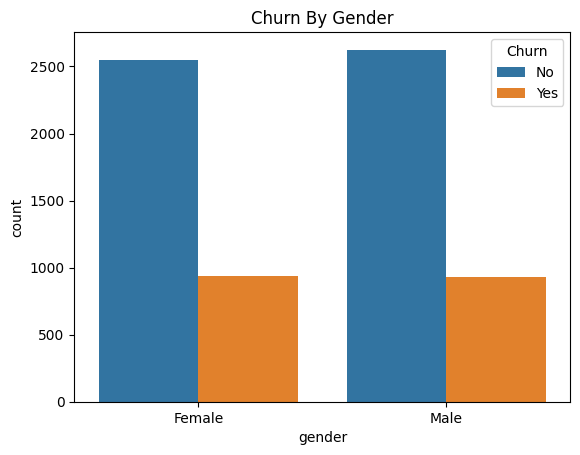

In [13]:

sns.countplot(x="gender", data=customer_data, hue="Churn")
plt.title("Churn By Gender")
plt.show()


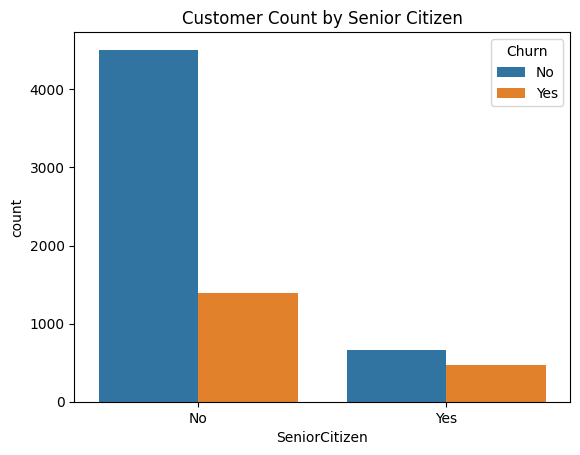

In [14]:

sns.countplot(x="SeniorCitizen", data=customer_data, hue="Churn")
plt.title("Customer Count by Senior Citizen")
plt.show()

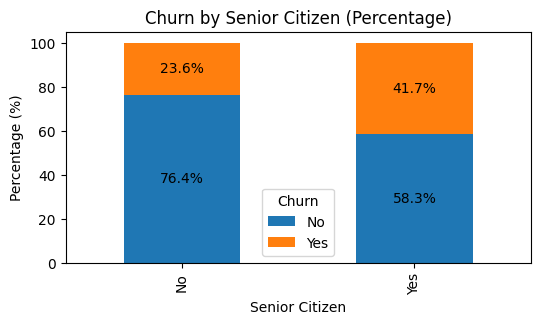

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Groupby + unstack for counts
ct = customer_data.groupby(["SeniorCitizen", "Churn"]).size().unstack()

# Convert to percentage
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Create plot
fig, ax = plt.subplots(figsize=(6,3))
ct_pct.plot(kind="bar", stacked=True, ax=ax)

plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn")

# FIX: use enumerate to get numeric x positions
for x_pos, (index, row) in enumerate(ct_pct.iterrows()):
    cumulative = 0
    for col in ct_pct.columns:
        val = row[col]
        if val > 0:
            ax.text(
                x_pos, cumulative + val/2,
                f"{val:.1f}%",
                ha="center", va="center", fontsize=10
            )
        cumulative += val

plt.show()


### Thus, we can say the customers who are senior citizen have churned out most.

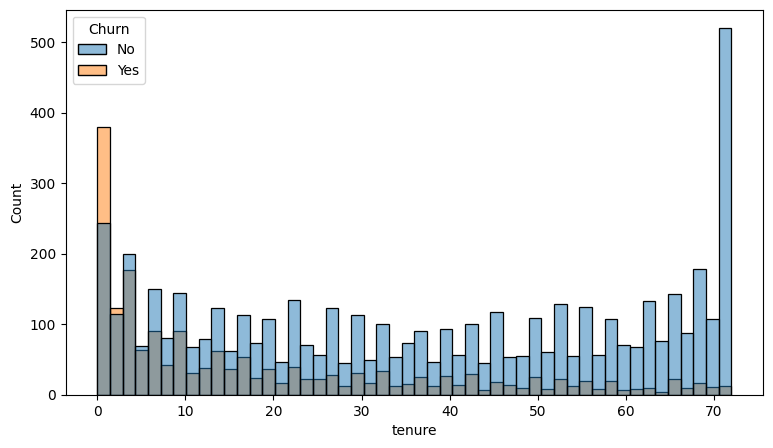

In [17]:
plt.figure(figsize=(9,5))
sns.histplot(x="tenure", data=customer_data, bins=50, hue="Churn")
plt.show()

In [18]:
# People whoo has used  our sevices for long time has stayed & the people who chrned out has been the member for less periorf

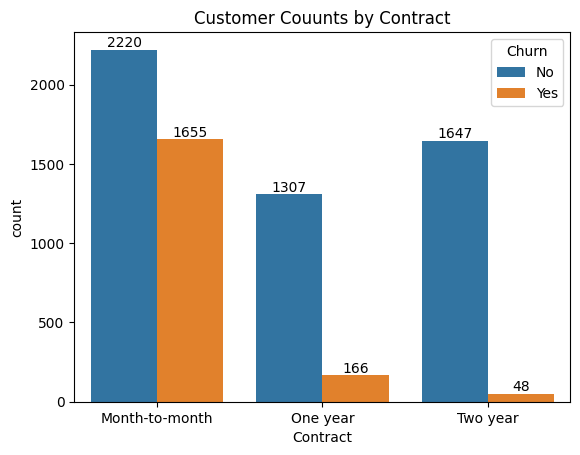

In [19]:
cn=sns.countplot(x = "Contract", data= customer_data, hue="Churn")
cn.bar_label(cn.containers[0])
cn.bar_label(cn.containers[1])
plt.title("Customer Couunts by Contract")
plt.show()
             

From the above Graph we can conclude that the people who have contracted in within months are likely to get churned, than the people who have a contract tenure for 1 or 2 years

In [21]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

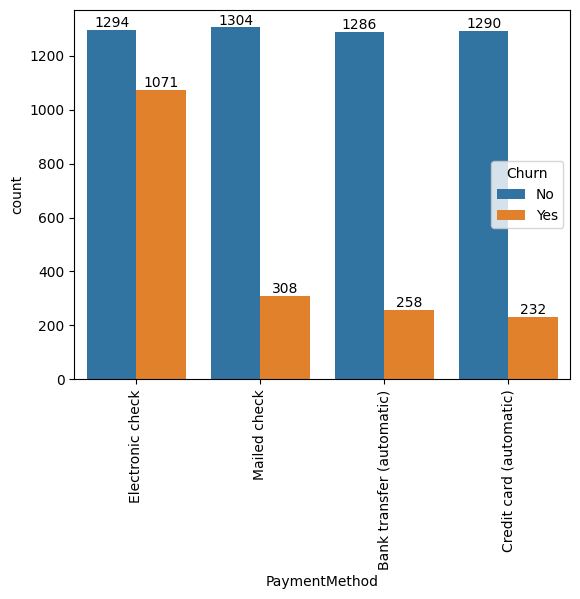

In [24]:
sm=sns.countplot(x="PaymentMethod",data=customer_data, hue="Churn")
sm.bar_label(sm.containers[0])
sm.bar_label(sm.containers[1])
plt.xticks(rotation=90)
plt.show()

The Customer is likely to churn when he is using on payment method Electronic Check

In [26]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
customer_data["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
customer_data["Partner"].unique()

array(['Yes', 'No'], dtype=object)

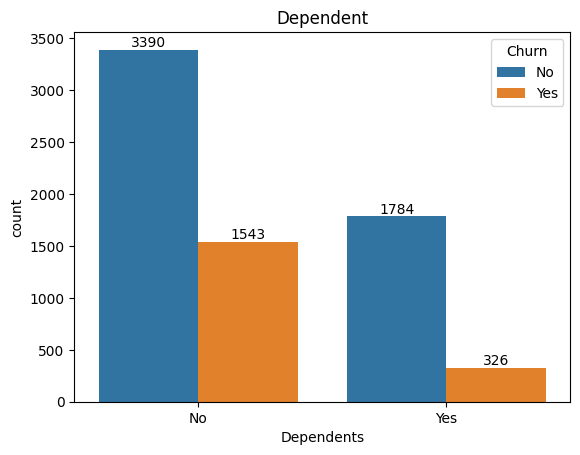

In [29]:
dp=sns.countplot(x = "Dependents", data=customer_data, hue= "Churn")
dp.bar_label(dp.containers[0])
dp.bar_label(dp.containers[1])
plt.title("Dependent")
plt.show()

Customers who are independents churn much more than those who have dependents, indicating that customers with dependents are more stable and less likely to leave the service.

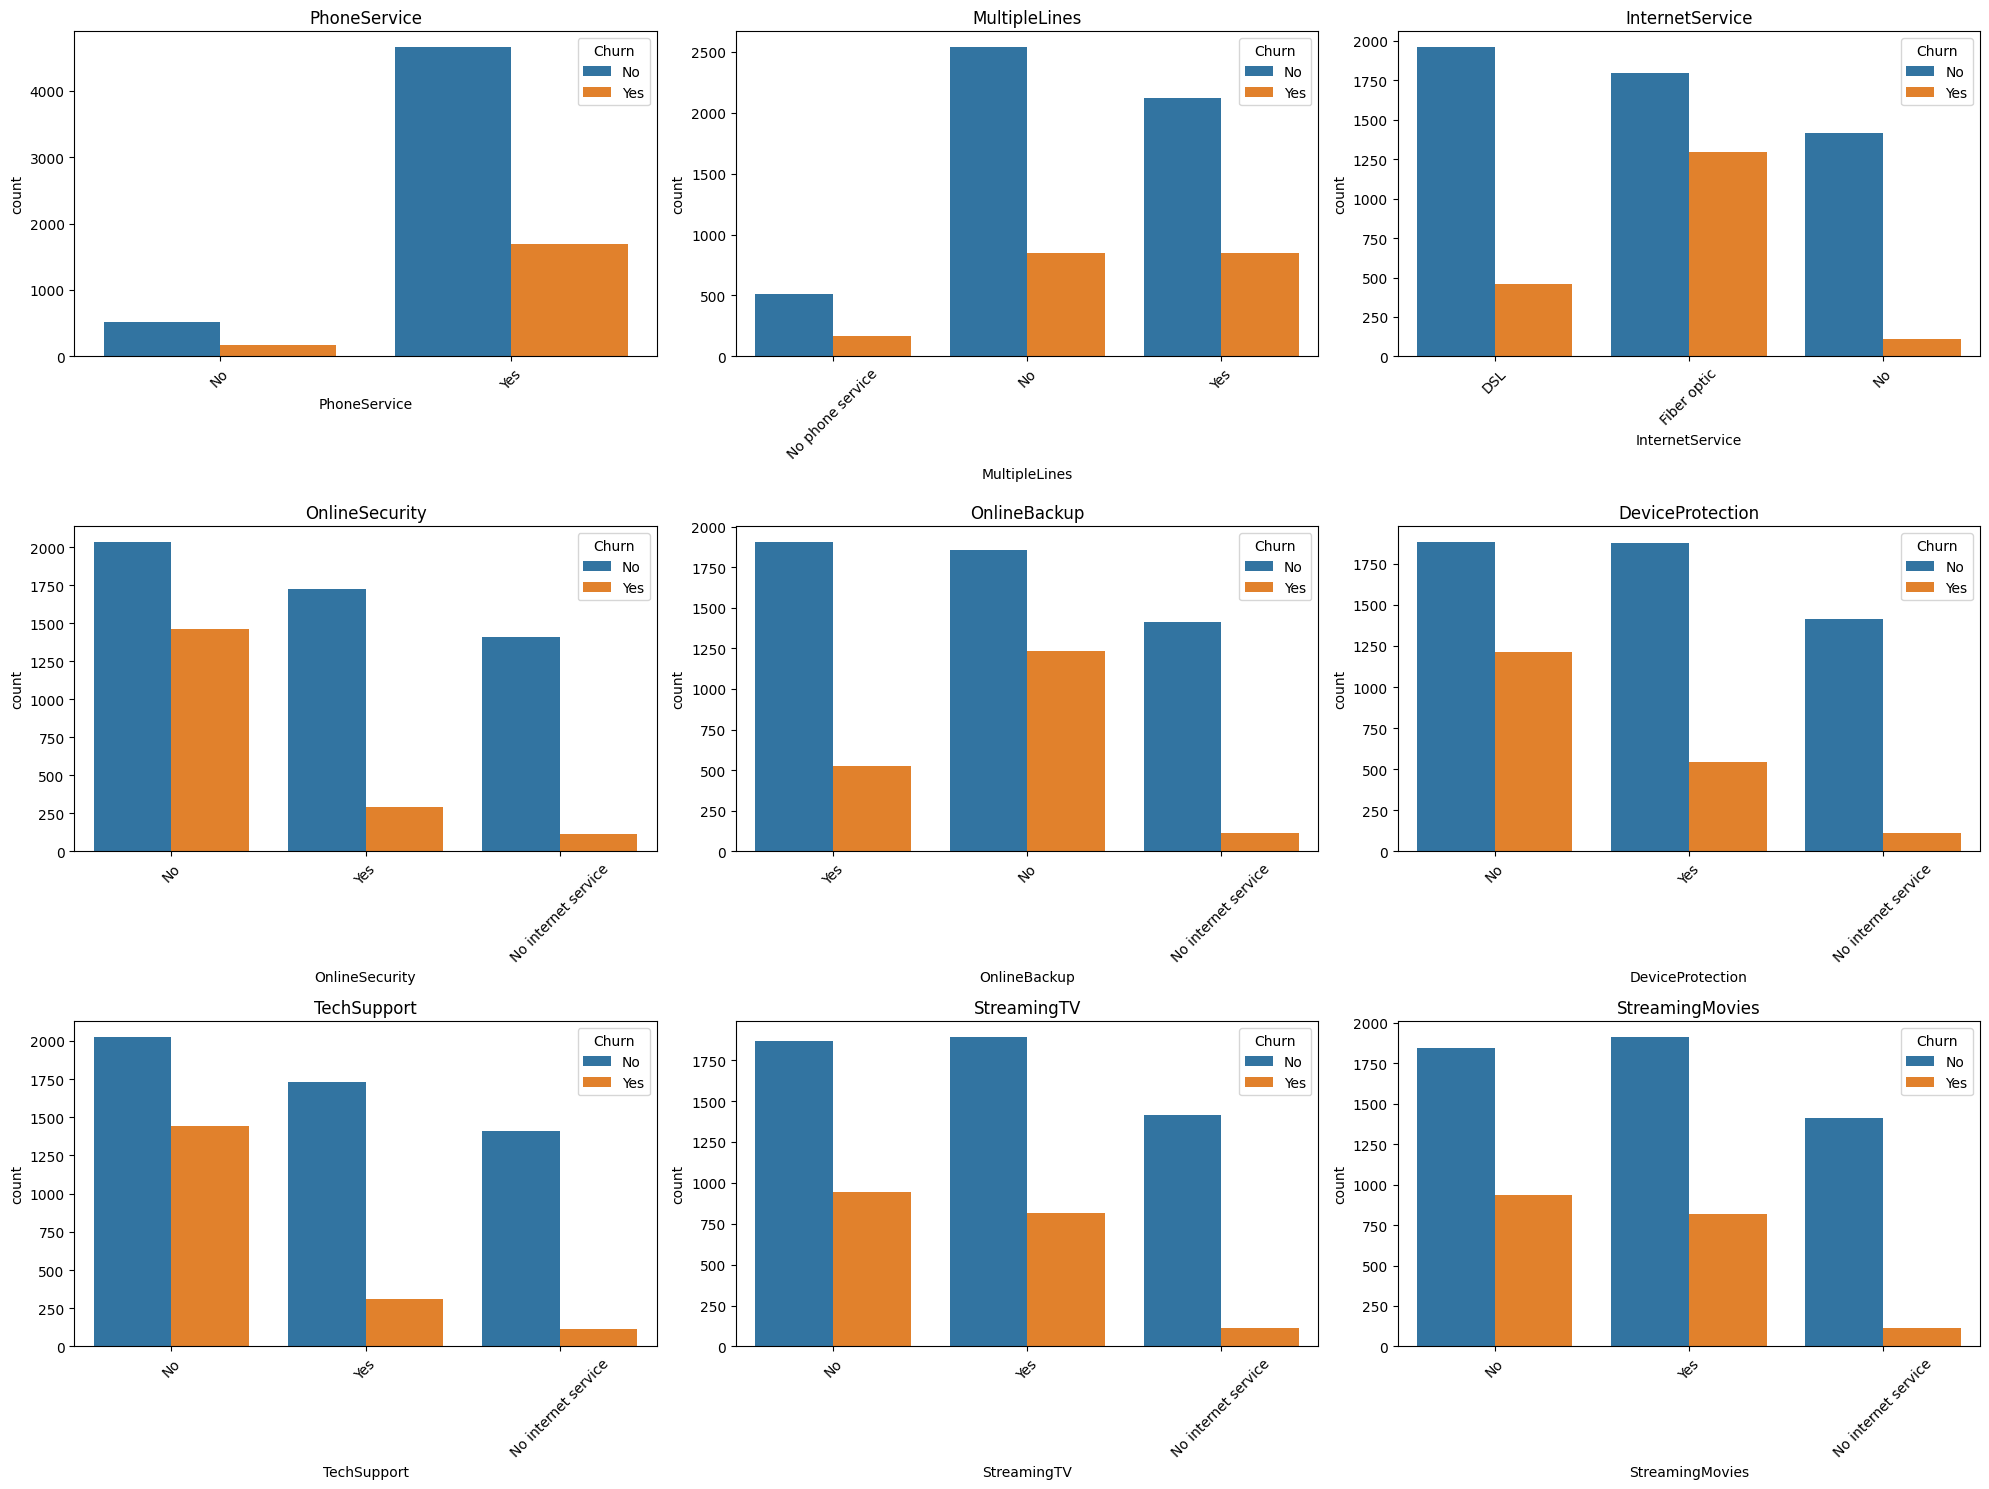

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(20, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=customer_data, hue="Churn")
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Customers who lack additional services such as Online Security, Tech Support, Device Protection, and Online Backup show significantly higher churn rates.
Fiber optic internet users churn the most, indicating possible dissatisfaction with this service type.
Overall, customers who subscribe to more add-on services tend to stay longer, while those without these services are more likely to leave.

# Summery

The analysis indicates that churn is heavily influenced by early customer experience, payment convenience, service quality, and adoption of additional support services. Targeted improvements in these areas can significantly strengthen customer retention.